<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B20190204%5D_PyTorch_Autograd_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference Site
*  https://github.com/chenyuntc/pytorch-book/blob/master/chapter3-Tensor%E5%92%8Cautograd/Autograd.ipynb

In [0]:
import torch as t
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np

In [0]:
# 设置随机数种子，为了在不同人电脑上运行时下面的输出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y = x*2 + 3，加上了一些噪声'''
    x = t.rand(batch_size,1) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1)
    return x, y

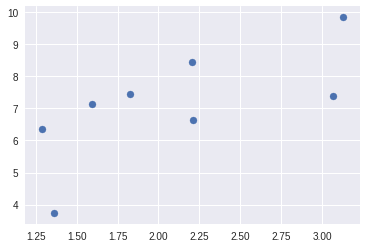

In [4]:
# 来看看产生x-y分布是什么样的
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

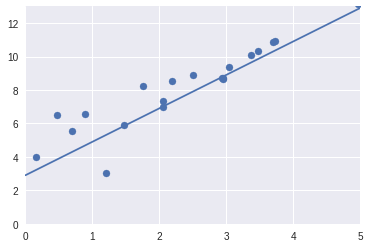

1.9335224628448486 2.954585552215576


In [12]:
t.set_default_tensor_type('torch.FloatTensor')

# 随机初始化参数
w = t.rand(1,1, requires_grad=True)
b = t.zeros(1,1, requires_grad=True)
losses = np.zeros(500)

lr =0.005 # 学习率

for ii in range(500):
    x, y = get_fake_data(batch_size=32)
    
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    losses[ii] = loss.item()
    
    # backward：手动计算梯度
    loss.backward()
    
    # 更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    # 梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii%50 ==0:
      
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1)
        
        y = x.mm(w.data.long()) 
        y= y.float()+ b.data.expand_as(x)
        
        plt.plot(x.numpy(), y.numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=20) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0,5)
        plt.ylim(0,13)   
        plt.show()
        plt.pause(0.5)
        
print(w.item(), b.item())

(5, 50)

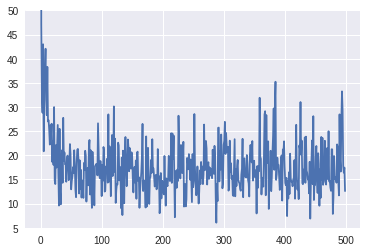

In [13]:
plt.plot(losses)
plt.ylim(5,50)